In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
N2_input = pd.read_csv('data/N2_input.csv', index_col='cycle')
N2_target = pd.read_csv('data/N2_target.csv', index_col='cycle')
NH3_input = pd.read_csv('data/NH3_input.csv', index_col='cycle')
NH3_target = pd.read_csv('data/NH3_target.csv', index_col='cycle')
N2_input.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.000423,0.000040,0.000463,0.000644,0.0,0.000060,0.000141,0.0,...,0.0,0.00002,0.00000,0.000000,0.000262,0.001087,0.000000,0.0,0.0,0.00004
1,0.0,0.0,0.000486,0.000405,0.000142,0.000546,0.0,0.000040,0.000000,0.0,...,0.0,0.00000,0.00000,0.000182,0.000101,0.001011,0.000000,0.0,0.0,0.00000
2,0.0,0.0,0.000261,0.000000,0.000221,0.000483,0.0,0.000241,0.000000,0.0,...,0.0,0.00000,0.00004,0.000101,0.000282,0.000825,0.000000,0.0,0.0,0.00000
3,0.0,0.0,0.000081,0.000000,0.000485,0.000546,0.0,0.000000,0.000162,0.0,...,0.0,0.00000,0.00000,0.000121,0.000040,0.001092,0.000202,0.0,0.0,0.00000
4,0.0,0.0,0.000120,0.000000,0.000160,0.000642,0.0,0.000261,0.000000,0.0,...,0.0,0.00000,0.00000,0.000000,0.000000,0.000822,0.000000,0.0,0.0,0.00000


(array([71., 23., 12., 10.,  2.,  1.]),
 array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006]),
 <BarContainer object of 6 artists>)

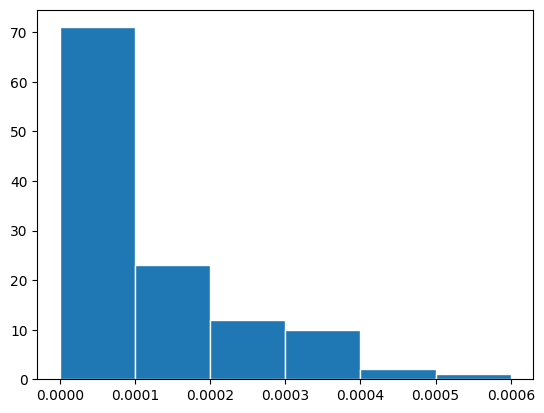

In [4]:
plt.hist(N2_input.iloc[:,3].values, bins=np.arange(0,0.0007,0.0001), edgecolor='white')

In [6]:
for i in range(len(N2_input.index)):
    for j in range(len(N2_input.columns)):
        if N2_input.iloc[i,j]<0.0001:
            N2_input.iloc[i,j]=0

for i in range(len(NH3_input.index)):
    for j in range(len(NH3_input.columns)):
        if NH3_input.iloc[i,j]<0.0001:
            NH3_input.iloc[i,j]=0

In [7]:
N2_input.columns = [round(float(i), 1) for i in N2_input.columns.values]
NH3_input.columns = [round(float(i), 1) for i in NH3_input.columns.values]

In [8]:
# interpolation
import numpy as np
new_col = np.arange(NH3_input.columns[0], NH3_input.columns[-1]+0.1, 0.1)
NH3_input_inter = pd.DataFrame(columns=new_col, index=NH3_input.index)
for idx, row in NH3_input.iterrows():
    NH3_input_inter.iloc[idx] = np.interp(new_col, NH3_input.columns.values, NH3_input.iloc[idx])
NH3_input_inter.index.name = 'cycle'
NH3_input_inter

,49.8,49.9,50.0,50.1,50.2,50.3,50.4,50.5,50.6,50.7,...,1190.9,1191.0,1191.1,1191.2,1191.3,1191.4,1191.5,1191.6,1191.7,1191.8
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.000683,0.001367,0.00205,0.002734,0.003417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000085,0.000169,0.000254,0.000339,0.000423,...,0.0,0.0,0.0,0.0,0.000169,0.000339,0.000508,0.000678,0.000847,0.001016
2,0.0,0.0,0.0,0.0,0.0,0.000914,0.001829,0.002743,0.003658,0.004572,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000119,0.000239,0.000358,0.000477,0.000597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000119,0.000237,0.000356,0.000474,0.000593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.0,0.0,0.0,0.0,0.0,0.000251,0.000502,0.000753,0.001004,0.001255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,0.0,0.0,0.0,0.0,0.0,0.000086,0.000172,0.000259,0.000345,0.000431,...,0.0,0.0,0.0,0.0,0.000259,0.000517,0.000776,0.001035,0.001294,0.001552
60,0.0,0.0,0.0,0.0,0.0,0.000493,0.000986,0.001479,0.001971,0.002464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
new_col = np.arange(N2_input.columns[0], N2_input.columns[-1]+0.1, 0.1)
N2_input_inter = pd.DataFrame(columns=new_col, index=N2_input.index)
for idx, row in N2_input.iterrows():
    N2_input_inter.iloc[idx] = np.interp(new_col, N2_input.columns.values, N2_input.iloc[idx])
N2_input_inter.index.name = 'cycle'
N2_input_inter

,49.8,49.9,50.0,50.1,50.2,50.3,50.4,50.5,50.6,50.7,...,1190.9,1191.0,1191.1,1191.2,1191.3,1191.4,1191.5,1191.6,1191.7,1191.8
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.00007,0.000141,0.000211,0.000282,0.000352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000081,0.000162,0.000243,0.000324,0.000405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000044,0.000087,0.000131,0.000174,0.000218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.0,0.0,0.0,0.0,0.0,0.000036,0.000072,0.000108,0.000144,0.00018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000043,0.000086,0.000129,0.000172,0.000215,0.000258


In [10]:
def DropFromSecond(x):
    x = x * 10
    x = np.floor(x)
    return x/10

new_col = [str(DropFromSecond(x)) for x in N2_input_inter.columns.astype(float)]
N2_input_inter.columns = new_col

new_col = [str(DropFromSecond(x)) for x in NH3_input_inter.columns.astype(float)]
NH3_input_inter.columns = new_col
NH3_input_inter.columns

Index(['49.8', '49.9', '50.0', '50.1', '50.2', '50.3', '50.4', '50.5', '50.6',
       '50.7',
       ...
       '1190.9', '1191.0', '1191.1', '1191.2', '1191.3', '1191.4', '1191.5',
       '1191.6', '1191.7', '1191.8'],
      dtype='object', length=11421)

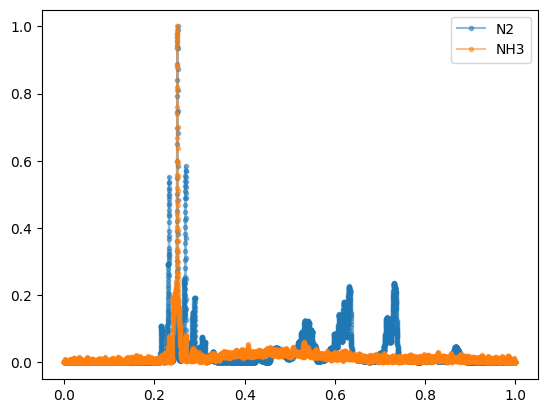

In [11]:
# wavelength scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(np.array(N2_input_inter.columns).reshape(-1, 1))
wavelength_scaled = mm.transform(np.array(N2_input_inter.columns).reshape(-1, 1)).flatten()

plt.plot(wavelength_scaled, N2_input_inter.iloc[0], '.-', alpha=0.5)
plt.plot(wavelength_scaled, NH3_input_inter.iloc[0], '.-', alpha=0.5)
plt.legend(['N2','NH3'])
plt.show()

In [12]:
from numpy import random
x = []
while len(set(x))<63:
    x.append(random.randint(1, 118))
len(list(set(x)))

63

In [13]:
# striking the balance between N2 and Nh3 datasets
N2_input = N2_input.iloc[list(set(x)),:]
N2_target = N2_target.iloc[list(set(x)),:]
print(len(N2_input), len(N2_target))

63 63


In [14]:
N2_input

,49.8,50.2,50.8,51.2,51.8,52.3,52.8,53.3,53.8,54.3,...,1186.4,1187.0,1187.6,1188.2,1188.8,1189.4,1190.0,1190.6,1191.2,1191.8
cycle,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.000261,0.000000,0.000221,0.000483,0.0,0.000241,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000282,0.000825,0.0,0.0,0.0,0.000000
8,0.0,0.0,0.000328,0.000000,0.000328,0.000778,0.0,0.000246,0.0,0.0,...,0.0,0.000205,0.0,0.000225,0.000000,0.001085,0.0,0.0,0.0,0.000000
10,0.0,0.0,0.000405,0.000203,0.000365,0.000689,0.0,0.000243,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000324,0.001277,0.0,0.0,0.0,0.000000
11,0.0,0.0,0.000000,0.000289,0.000227,0.000846,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000310,0.000991,0.0,0.0,0.0,0.000000
13,0.0,0.0,0.000501,0.000000,0.000000,0.000647,0.0,0.000292,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000292,0.001274,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.0,0.0,0.000271,0.000000,0.000000,0.000835,0.0,0.000000,0.0,0.0,...,0.0,0.000271,0.0,0.000000,0.000271,0.001232,0.0,0.0,0.0,0.000000
106,0.0,0.0,0.000408,0.000000,0.000236,0.000989,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.001397,0.0,0.0,0.0,0.000000
110,0.0,0.0,0.000000,0.000214,0.000000,0.000727,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.001111,0.0,0.0,0.0,0.000000


In [15]:
N2_target

,C1s,N1s,O1s,Si2p,Cl2p
cycle,,,,,
2,0.023331,0.275058,0.188807,0.474851,0.037952
8,0.023120,0.273546,0.188591,0.477137,0.037606
10,0.023049,0.273042,0.188518,0.477899,0.037490
11,0.023014,0.272790,0.188482,0.478280,0.037433
13,0.022944,0.272286,0.188410,0.479042,0.037317
...,...,...,...,...,...
105,0.019702,0.249099,0.185088,0.514098,0.032013
106,0.019666,0.248846,0.185052,0.514479,0.031955
110,0.019525,0.247838,0.184908,0.516003,0.031725


In [21]:
# combine N2 and NH3 data
data = pd.concat([N2_input, NH3_input])
target = pd.concat([N2_target, NH3_target])

print(len(data), len(target))
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=42)

126 126


In [22]:
from sklearn.linear_model import LinearRegression

for idx, col in enumerate(target.columns):
    rl = LinearRegression()
    rl.fit(train_input, train_target[col])
    print(f'[{col}]', 'train score :', np.round(rl.score(train_input, train_target[col]),3), 'test score :', np.round(rl.score(test_input, test_target[col]), 3))

rl = LinearRegression()
rl.fit(train_input, train_target)
print('[All] :', 'train score :', rl.score(train_input, train_target), 'test score :', np.round(rl.score(test_input, test_target),3))

[C1s] train score : 1.0 test score : 0.998
[N1s] train score : 1.0 test score : 0.832
[O1s] train score : 1.0 test score : 0.943
[Si2p] train score : 1.0 test score : 0.401
[Cl2p] train score : 1.0 test score : 1.0
[All] : train score : 1.0 test score : 0.835


In [23]:
from sklearn.model_selection import cross_validate

for idx, col in enumerate(target.columns):
    rl = LinearRegression()
    scores = cross_validate(rl, train_input, train_target)
    print(f'[{col}]', 'score :', np.mean(scores['test_score']))

[C1s] score : 0.743936484050188
[N1s] score : 0.743936484050188
[O1s] score : 0.743936484050188
[Si2p] score : 0.743936484050188
[Cl2p] score : 0.743936484050188


In [24]:
ref = pd.read_excel('../file/etc/emission_spectrum.xlsx')
ref.head()

,name,wavelength
0,SiN,353.5
1,SiN,404.8
2,SiN,405.1
3,SiN,408.0
4,SiN,408.7


49.8 1191.8


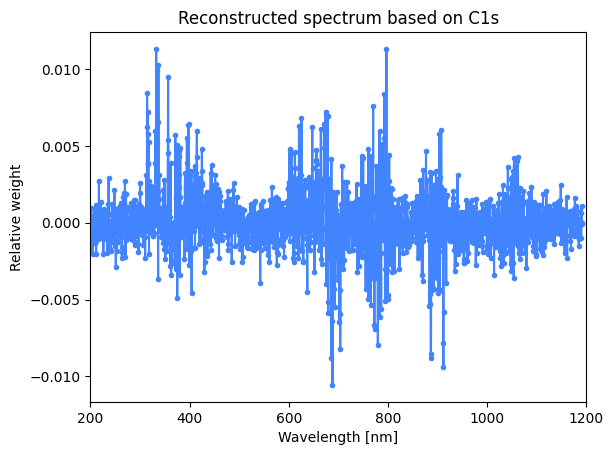

In [28]:
import random
random.seed(1)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(30)]

wv_c = []
for idx, row in ref.iterrows():
    if 'C' in row['name']:
        wv_c.append(row['wavelength'])

col = 'C1s'
i=0
rl_c = LinearRegression(positive=False, fit_intercept=True)
rl_c.fit(train_input, train_target[col])

# wavelength scaling
wv = np.arange(len(rl_c.coef_)) * 1142 / 2047 + 49.8
print(wv[0], wv[-1])

plt.plot(wv, rl_c.coef_, '.-', color=colors[i])
# plt.bar(wv_c, np.ones(len(wv_C)), color=colors[i+1])
plt.xlim(200,1200)
# plt.ylim(0,rl_c.coef_.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()

reconstructed = []
reconstructed.append(rl_c.coef_)

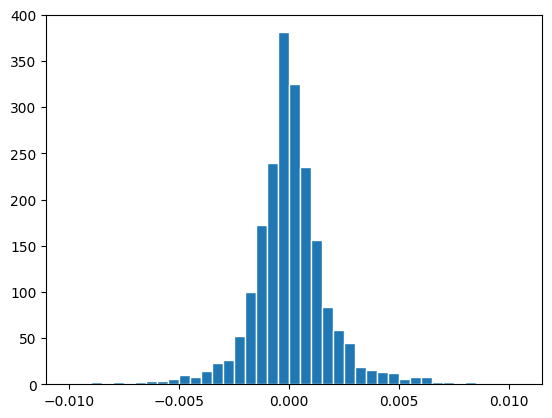

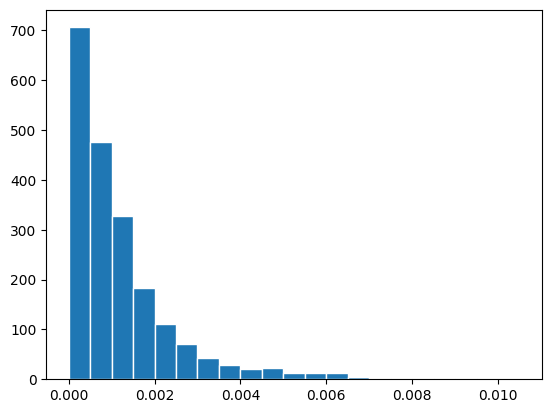

In [42]:
plt.hist(rl_c.coef_, bins=np.arange(-0.01,0.011,0.0005), edgecolor='white')
plt.show() # normal distribution

plt.hist(abs(rl_c.coef_), bins=np.arange(0,0.011,0.0005), edgecolor='white')
plt.show()

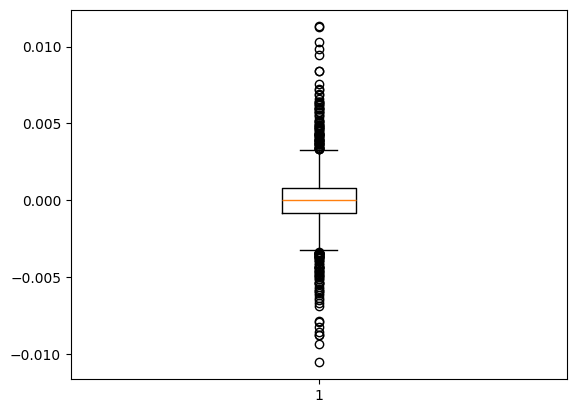

0.0008151923340345427


In [43]:
# boxplot
plt.boxplot(rl_c.coef_)
plt.show()
print(np.quantile(rl_c.coef_, 0.75))

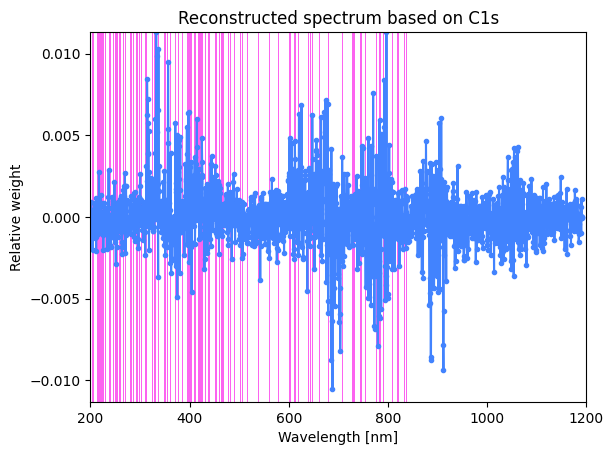

In [45]:
plt.plot(wv, rl_c.coef_, '.-', color=colors[i])
plt.bar(wv_c, rl_c.coef_.max()*np.ones(len(wv_c)), color=colors[i+1])
plt.bar(wv_c, -rl_c.coef_.max()*np.ones(len(wv_c)), color=colors[i+1])
plt.xlim(200,1200)
plt.ylim(-rl_c.coef_.max(),rl_c.coef_.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()

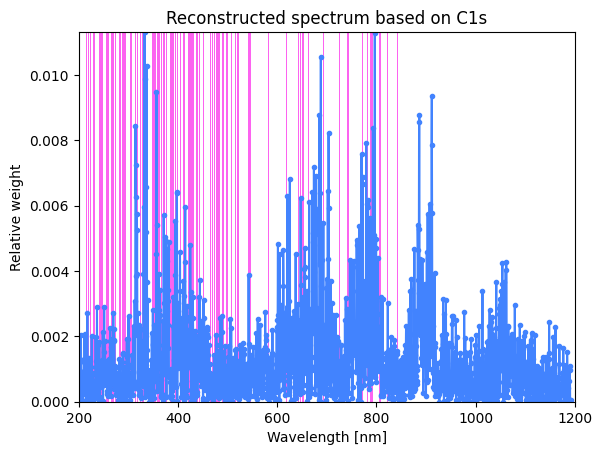

In [47]:
i=0
plt.plot(wv, abs(rl_c.coef_), '.-', color=colors[i])
plt.bar(wv_c, rl_c.coef_.max()*np.ones(len(wv_c)), color=colors[i+1])
# plt.bar(wv_c, -rl_c.coef_.max()*np.ones(len(wv_C)), color=colors[i+1])
plt.xlim(200,1200)
plt.ylim(0,rl_c.coef_.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()

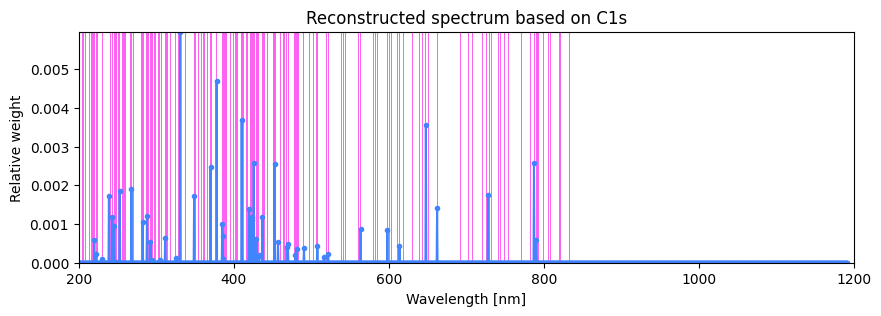

In [70]:
ref_c = [] # boolean array
for i in wv:
    if round(i,1) in [round(j,1) for j in wv_c]:
        ref_c.append(1)
    else:
        ref_c.append(0)
        
plot_c = np.array(abs(rl_c.coef_)) * np.array(ref_c) 
plt.figure(figsize=(10,3))
plt.plot(wv, plot_c, '.-', color=colors[0])
plt.bar(wv_c, rl_c.coef_.max()*np.ones(len(wv_c)), color=colors[1])
plt.xlim(200,1200)
plt.ylim(0,plot_c.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()

In [56]:
# how much do the account for the spectrum? 20%
sum(plot_c) / sum(abs(rl_c.coef_))

0.023891215649611233

In [58]:
abs(rl_c.coef_)

array([5.19937443e-04, 2.42903845e-05, 2.34136880e-05, ...,
       0.00000000e+00, 0.00000000e+00, 5.46213838e-05])

In [78]:
# alternatively, find a local maximum around the given lines with a margin set by an user considering a limitation of a spectrometer
wv_c_max_idx = []
wv_c_shift = [] # to estimate the limit of resolustion
for idx, b in enumerate(ref_c):
    if b == 1:
        temp = np.arange(idx-5, idx+5, 1) # margin += 0.5 nm
        temp_idx = idx + np.argmax(abs(rl_c.coef_)[temp]) -5
        wv_c_max_idx.append(temp_idx)
        wv_c_shift.append(idx-temp_idx)
    else:
        continue

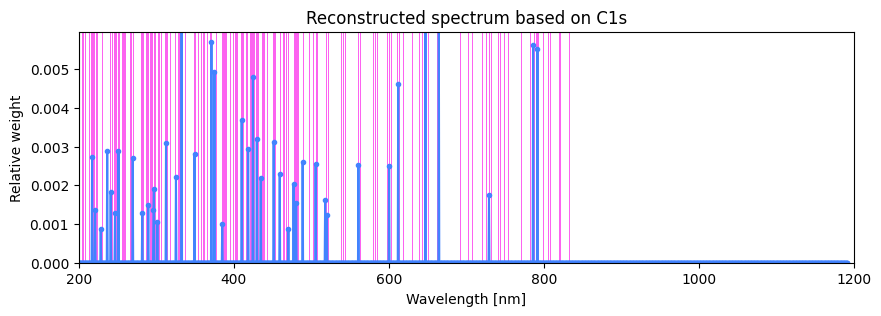

In [80]:
ref_c2 = [] # boolean array
for i in wv:
    if round(i,1) in [round(j,1) for j in wv[wv_c_max_idx]]:
        ref_c2.append(1)
    else:
        ref_c2.append(0)

plot_c2 = np.array(abs(rl_c.coef_)) * np.array(ref_c2) 
plt.figure(figsize=(10,3))
plt.plot(wv, plot_c2, '.-', color=colors[0])
plt.bar(wv_c, rl_c.coef_.max()*np.ones(len(wv_c)), color=colors[1])
plt.xlim(200,1200)
plt.ylim(0,plot_c.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()

In [83]:
np.mean(np.array(wv_c_shift)) # check agreement with other data 

0.38461538461538464

In [99]:
# how much do the account for the spectrum? 20%
sum(plot_c2) / sum(abs(rl_c.coef_)) # 50 % increase

0.04958922014343042

In [88]:
# import emission spectrum of C
df_c = pd.read_excel('../emission_spectrum/C.xlsx')
df_c.head()

,intensity,wavelength,Unnamed: 2,Unnamed: 3
0,600 P,687.0526,C II,KE74
1,1000 P,687.346,C II,KE74
2,150,903.6235,C II,KE74
3,300,903.9616,C II,KE74
4,750 P,904.1416,C II,KE74


In [89]:
# in order to remove p label,
df = df_c.copy()
temp = []
df['wavelength'] = df['wavelength'].astype(float)
df['wavelength'] = df['wavelength'].apply(lambda x:x/10)
df['wavelength'] = df['wavelength'].apply(lambda x: round(x,3))
df['intensity'] = df['intensity'].apply(lambda x: str(x))
for elem in df['intensity']:
    temp.append(elem.split('\xa0'))
for i in range(len(temp)):
    while '' in temp[i]:
        temp[i].remove('')
    while '*' in temp[i]:
        temp[i].remove('*')
    while 'P' in temp[i]:
        temp[i].remove('P')
    while 'P,d' in temp[i]:
        temp[i].remove('P,d')            
df['intensity'] = np.array(temp).flatten().tolist()
df['intensity'] = df['intensity'].astype(float)

In [91]:
df

,intensity,wavelength,Unnamed: 2,Unnamed: 3
0,600.0,68.705,C II,KE74
1,1000.0,68.735,C II,KE74
2,150.0,90.362,C II,KE74
3,300.0,90.396,C II,KE74
4,750.0,90.414,C II,KE74
5,150.0,90.448,C II,KE74
6,250.0,103.634,C II,KE74
7,500.0,103.702,C II,KE74
8,300.0,119.301,C I,J66
9,300.0,119.303,C I,J66


<BarContainer object of 34 artists>

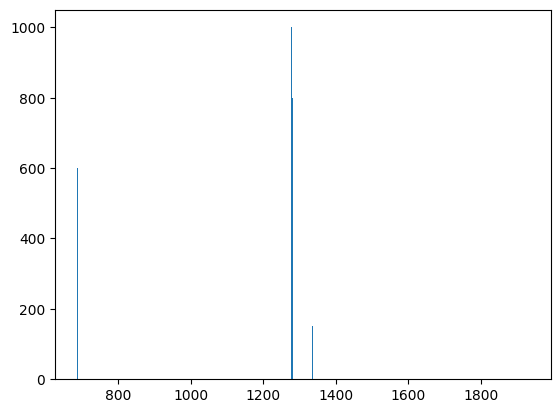

In [98]:
plt.bar(df['wavelength']*10, df['intensity'])

In [299]:
wv_N = []
for idx, row in ref.iterrows():
    if row['name'].find('N') == True:
        wv_N.append(row['wavelength'])
len(wv_N)

42

In [300]:
wv_N = []
for idx, row in ref.iterrows():
    if 'N' in row['name']:
        wv_N.append(row['wavelength'])

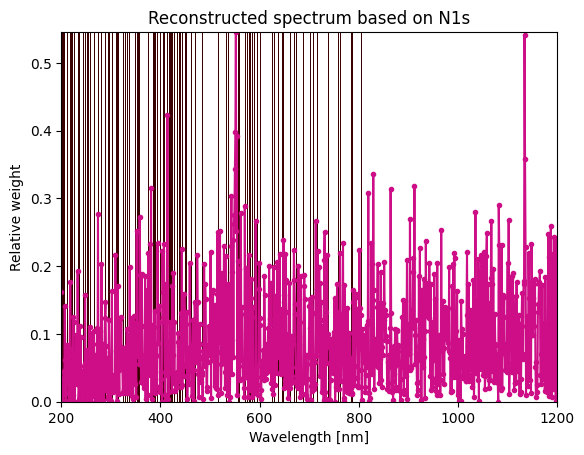

In [301]:
col ='N1s'
i=2
rl_N = LinearRegression()
rl_N.fit(train_input, train_target[col])

# compared input and predicted values
plt.plot(abs(rl_N.coef_), '.-', color=colors[i])
plt.bar(wv_N, np.ones(len(wv_N)), color=colors[i+1])
plt.xlim(200,1200)
plt.ylim(0,rl_N.coef_.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()

In [ ]:
ref_c = []
for i in wv:
    if round(i,1) in [round(j,1) for j in wv_c]:
        ref_c.append(1)
    else:
        ref_c.append(0)
        
plot_c = np.array(abs(rl_c.coef_)) * np.array(ref_c)
plt.figure(figsize=(10,3))
plt.plot(wv, plot_c, '.-', color=colors[0])
plt.bar(wv_c, rl_c.coef_.max()*np.ones(len(wv_C)), color=colors[1])
plt.xlim(200,1200)
plt.ylim(0,plot_c.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()

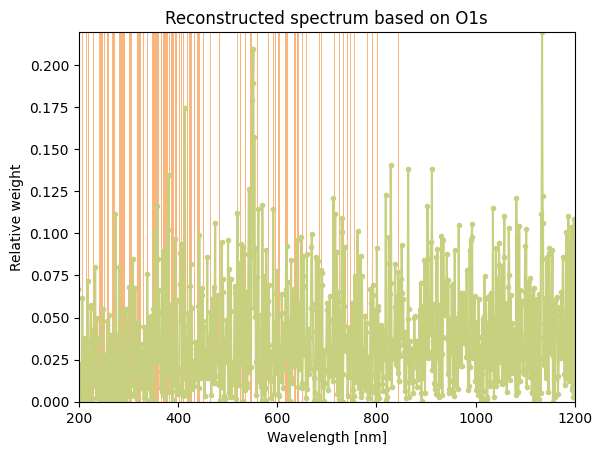

In [239]:
wv_O = []
for idx, row in ref.iterrows():
    if 'O' in row['name']:
        wv_O.append(row['wavelength'])

col ='O1s'
i=4
rl_O = LinearRegression()
rl_O.fit(train_input, train_target[col])

# compared input and predicted values
plt.plot(abs(rl_O.coef_), '.-', color=colors[i])
plt.bar(wv_O, np.ones(len(wv_O)), color=colors[i+1])
plt.xlim(200,1200)
plt.ylim(0,rl_O.coef_.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()

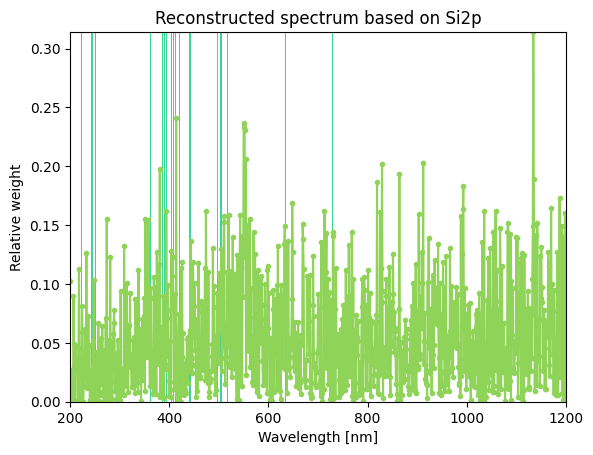

In [240]:
wv_Si = []
for idx, row in ref.iterrows():
    if 'Si' in row['name']:
        wv_Si.append(row['wavelength'])

col ='Si2p'
i=6
rl_Si = LinearRegression()
rl_Si.fit(train_input, train_target[col])

# compared input and predicted values
plt.plot(abs(rl_Si.coef_), '.-', color=colors[i])
plt.bar(wv_Si, np.ones(len(wv_Si)), color=colors[i+1])
plt.xlim(200,1200)
plt.ylim(0,rl_Si.coef_.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()

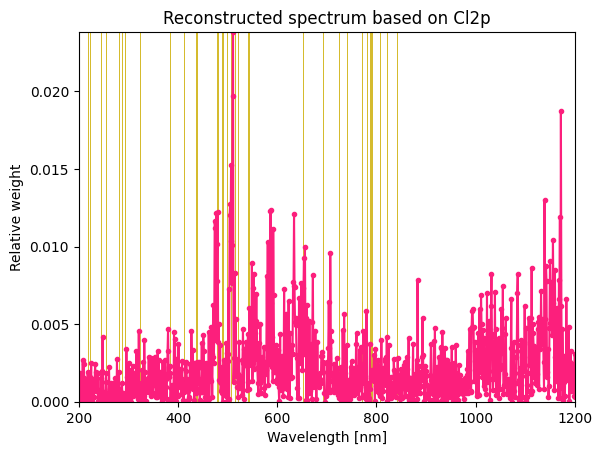

In [241]:
wv_cl = []
for idx, row in ref.iterrows():
    if 'Cl' in row['name']:
        wv_cl.append(row['wavelength'])

col ='Cl2p'
i=8
rl_cl = LinearRegression()
rl_cl.fit(train_input, train_target[col])

# compared input and predicted values
plt.plot(abs(rl_cl.coef_), '.-', color=colors[i])
plt.bar(wv_cl, np.ones(len(wv_cl)), color=colors[i+1])
plt.xlim(200,1200)
plt.ylim(0,rl_cl.coef_.max())
plt.title(f'Reconstructed spectrum based on {col}')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Relative weight')
plt.show()